# Mass Attrocities Data 
the data used is from a mulitude of sources including 
This notebook explores the number of non-combatant civillians have been deliberately killed over time in the face of a larger political coflict using the Dataset(http://eventdata.parusanalytics.com/data.dir/atrocities.html).  Other data used includes the IMF and the world population data base 

https://www.imf.org/external/pubs/ft/weo/2018/02/weodata/weorept.aspx?pr.x=73&pr.y=11&sy=2018&ey=2018&ssd=1&sort=country&ds=.&br=0&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C546%2C213%2C962%2C911%2C674%2C314%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C836%2C918%2C558%2C748%2C138%2C618%2C196%2C624%2C278%2C522%2C692%2C622%2C694%2C156%2C142%2C626%2C449%2C628%2C564%2C228%2C565%2C924%2C283%2C233%2C853%2C632%2C288%2C636%2C293%2C634%2C566%2C238%2C964%2C662%2C182%2C960%2C359%2C423%2C453%2C935%2C968%2C128%2C922%2C611%2C714%2C321%2C862%2C243%2C135%2C248%2C716%2C469%2C456%2C253%2C722%2C642%2C942%2C643%2C718%2C939%2C724%2C734%2C576%2C644%2C936%2C819%2C961%2C172%2C813%2C132%2C726%2C646%2C199%2C648%2C733%2C915%2C184%2C134%2C524%2C652%2C361%2C174%2C362%2C328%2C364%2C258%2C732%2C656%2C366%2C654%2C144%2C336%2C146%2C263%2C463%2C268%2C528%2C532%2C923%2C944%2C738%2C176%2C578%2C534%2C537%2C536%2C742%2C429%2C866%2C433%2C369%2C178%2C744%2C436%2C186%2C136%2C925%2C343%2C869%2C158%2C746%2C439%2C926%2C916%2C466%2C664%2C112%2C826%2C111%2C542%2C298%2C967%2C927%2C443%2C846%2C917%2C299%2C544%2C582%2C941%2C474%2C446%2C754%2C666%2C698&s=NGDPDPC&grp=0&a=#download Population from http://www.worldpopdata.org/table




# To see my gif of deaths over time please look at the powerpoint presentation I have created
https://docs.google.com/presentation/d/1LLvPCtEW_ZBfoGY7ccPVkw2zq4-iNeWtXbtunVoWpY4/edit?usp=sharing




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt



## Basic call:
my first step is reading in three separate data sets from 1992-2012, 2013-2015, and 2015-2019.
The basic appraoch for these packages is to change the data into a presentable format as I will eventually need to alter the complete shape of the data for later on. 

In [6]:
url_1992= pd.read_csv('/Users/annikasquires/Desktop/1992-2013.csv') #1992-2012 data
url_2013= pd.read_csv('/Users/annikasquires/Desktop/Pitf 2013-2015.csv') #2013-2015 data
url_2016=pd.read_csv('/Users/annikasquires/Desktop/Genocide Data/PTIF 2016-2019.csv') # 2016-2017



My next step forward will be to look at the individual data sets and chagne the columns so that they all have the same names. Due to the data being on three different sheets originally, the columns all give the same data however some of the names are different.
For example: 

url_1992 may originally have Event Type as a categorical heading whilst url_2013 has Event Types, this led to many errors when trying to combine the data sets


In [8]:

#long columns [79 categories] done over multiple years, the columns/column names may not exactly be the same which is why I need to analyze them 

url_1992=url_1992[['Event Type','Event Reporting','Start Year','Country','Victim Noncombatant Asserted','Victim Noncombatant Contested','Deaths Number','Deaths Scale','Injured Number','Injured Scale','Organization of Violence','Weapons']]


url_2013=url_2013[['Event Type','Event Reporting','Start Year','Country','Victim Noncombatant Asserted','Victim Noncombatant Contested','Deaths Number','Deaths Scale','Injured Number','Injured Scale','Organization of Violence','Weapons']]


url_2016= url_2016[['Event Type','Event Reporting','Start Year','Country','Victim Noncombatant Asserted','Victim Noncombatant Contested','Deaths Number','Deaths Scale','Injured Number','Injured Scale','Organization of Violence','Weapons']]

My next step is analyzing all of the data and changing it to be able to eventually use geopandas. The original data presents Deaths Number in every column as an object due to some data having commas/ words/ other issues I need to get rid of any data which will not be able to be plotted and convert all the data into ints. The data for url_2016 is much neater than the other data, thus we will be focusing on only 2013 and 1992

In [10]:
url_1992.dtypes

url_1992['Deaths Number'].value_counts()



url_1992[pd.to_numeric(url_1992['Deaths Number'], errors='coerce').notnull()]


#changed int 64
url_1992= url_1992.fillna(0)

url_1992['Deaths Number'] = url_1992['Deaths Number'].astype('float')

url_1992['Deaths Number'].dtypes

url_2013.dtypes


#url_2013= url_2013[url_2013['Deaths Number'].apply(lambda x: isinstance(x, (int, np.int64)))]

url_2013= url_2013.fillna(0)




#url_2013[pd.to_numeric(url_2013['Deaths Number'], errors='coerce').notnull()]

url_2013['Deaths Number'] = url_2013['Deaths Number'].astype('int64')

url_2013.dtypes

Event Type                       object
Event Reporting                  object
Start Year                        int64
Country                          object
Victim Noncombatant Asserted     object
Victim Noncombatant Contested    object
Deaths Number                     int64
Deaths Scale                     object
Injured Number                   object
Injured Scale                    object
Organization of Violence         object
Weapons                          object
dtype: object

Now that the data has been cleaned up, I will be able toappend the three data sets which I will use the project

In [42]:
#need to re-ad inndex 

df=url_1992.append([url_2013,url_2016],'sort=False') #after the columns are all sorted I will combine them here 

df= df.rename(columns={'Deaths Number':'Deaths'})

year= df.rename(columns={'Start Year':'Year'})



df.dtypes




Event Type                        object
Event Reporting                   object
Start Year                       float64
Country                           object
Victim Noncombatant Asserted      object
Victim Noncombatant Contested     object
Deaths                           float64
Deaths Scale                      object
Injured Number                    object
Injured Scale                     object
Organization of Violence          object
Weapons                           object
dtype: object

import numpy as np
df= df[df['Deaths Number'].apply(lambda x: isinstance(x, (int, np.int64)))]



df['Deaths Number'] = df['Deaths Number'].astype('int64')




df.dtypes


df



# Basic call: Start on data accesibility for Geopandas

In [48]:
from IPython.display import display, Image # Displays things nicely
import pandas as pd # Key tool 
import matplotlib.pyplot as plt # Helps plot
import numpy as np # Numerical operations
import os

#import fiona 
import geopandas as gpd # this is the main geopandas 
from shapely.geometry import Point, Polygon # also needed



from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


#get the map we want 
map_df= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))




In [49]:
map_df.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

In [50]:
data_for_map = df

In [51]:
merged = map_df.set_index('iso_a3').join(data_for_map.set_index('Country'))

In [52]:
merged.dtypes

pop_est                            int64
continent                         object
name                              object
gdp_md_est                       float64
geometry                          object
Event Type                        object
Event Reporting                   object
Start Year                       float64
Victim Noncombatant Asserted      object
Victim Noncombatant Contested     object
Deaths                           float64
Deaths Scale                      object
Injured Number                    object
Injured Scale                     object
Organization of Violence          object
Weapons                           object
dtype: object

In [55]:
merged[5:]

pop_est continent          name  gdp_md_est  \
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
AFG  34124811      Asia   Afghanistan     64080.0   
..        ...       ...           ...         ...   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZAF  54841552    Africa  South Africa    739100.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZMB  15972000    Africa        Zambia     65170.0   
ZWE  13805084    Africa      Zimbabwe     28330.0   
ZWE  13805084    Africa      Zimbabwe     28330.0   
ZWE  13805084    Africa      Zimbabwe     28330.0   
ZWE  13805084    Africa      Zimbabwe     28330.0   

                                              geometry Event Type  \
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Campaign   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528867 37.36278432875879,...   Incident   
AFG  POLYGON ((66.51860680528

Now,we have a combined data frame with to make a map however we still have lots to do before we can make the map as we need to completely changed the Data Frame

# set a variable that will call whatever column we want to visualise on the map
variable = 'Deaths'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 16))


ax.axis('off')




merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)




##### NEW FOR LOOP
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['','200907','201007','201107','201207','201307','201407','201507','201607']



#save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['1995','200907','201007','201107','201207','201307','201407','201507','201607']

import mapclassify as mc
fig, ax = plt.subplots(figsize = (20,11))

# First create the map for the urban share


merged.plot(ax = ax, edgecolor='tab:grey',
             column='Deaths', # THIS IS NEW, it says color it based on this column
             cmap='OrRd', # This is the color map scheme https://matplotlib.org/examples/color/colormaps_reference.html
             alpha = 1,
            scheme= 'quantiles')
#fig.axis('off')

plt.show()




star_year= (merged['Start Year'].tolist)

s
#ax = merged.dropna().plot(column=merged['Deaths'], cmap='Blues', scheme='equal_interval', 

# Basic Call: Groupby Merge, Index and Pivot to make new combined data frames 

We first need to change the name of Start Year in merged to year which makes it easier to call, next we will make a data frame that has only the Death's and years 

In [ ]:
merged= merged.rename(columns={'Start Year':'year'})


new_df= merged[['Deaths','year']].reset_index()

In [58]:
new_df

year  Deaths
index                
AFG    1995.0   461.0
AFG    1996.0   326.0
AFG    1997.0    26.0
AFG    1998.0  2744.0
AFG    1999.0    19.0
AFG    2000.0    58.0
AFG    2001.0   573.0
AFG    2002.0   186.0
AFG    2003.0   125.0
AFG    2004.0   120.0
AFG    2005.0   118.0
AFG    2006.0   261.0
AFG    2007.0   391.0
AFG    2008.0   410.0
AFG    2009.0   549.0
AFG    2010.0   567.0
AFG    2011.0   852.0
AFG    2012.0   538.0
AFG    2013.0   558.0
AFG    2014.0   679.0
AFG    2015.0   576.0
AFG    2016.0   534.0
AFG    2017.0   933.0
AFG    2018.0  1509.0
AFG    2019.0   110.0
AGO    1995.0   199.0
AGO    1997.0    36.0
AGO    1998.0   202.0
AGO    1999.0   309.0
AGO    2000.0   227.0
...       ...     ...
YEM    2015.0  1685.0
YEM    2016.0   836.0
YEM    2017.0   582.0
YEM    2018.0   505.0
YEM    2019.0    89.0
ZAF    1995.0   783.0
ZAF    1996.0   334.0
ZAF    1997.0   175.0
ZAF    1998.0    46.0
ZAF    1999.0    47.0
ZAF    2000.0    18.0
ZAF    2001.0    26.0
ZAF    2002.0     7.0
ZAF    2006.0     6.0
ZAF    2008.0    62.0
ZAF    2012.0     5.0
ZAF    2013.0    19.0
ZAF    2014.0     2.0
ZAF    2015.0    11.0
ZAF    2016.0     7.0
ZAF    2017.0    37.0
ZAF    2018.0    16.0
ZAF    2019.0     1.0
ZMB    2001.0     7.0
ZMB    2008.0   191.0
ZMB    2012.0     5.0
ZWE    2002.0    56.0
ZWE    2013.0     1.0
ZWE    2015.0     2.0
ZWE    2018.0     7.0

[1164 rows x 2 columns]

In [ ]:
#reshape so we need each country to only plot for 11 hting per year

new_df= new_df[5:]


new_df= new_df.groupby(['index','year']).sum()



new_df= new_df.reset_index(level='year')

We wil now make a new df which will pivot our prior data frame so that we can make our column's the years value and the values will be the sum of deaths per place per year. not all of our countries provide us data for every year so we will have many empty values on this new dataframe.



# on a side note, it is important to keep in mind having less values is a good thing as each numerical value accounts for deaths 

In [67]:
merged1= new_df.pivot(columns='year', values='Deaths')


merged1


df3= new_df.pivot(columns='year', values='Deaths')

In [68]:
merged1

year   1992.0  1994.0   1995.0   1996.0  1997.0  1998.0  1999.0  2000.0  \
index                                                                     
AFG       NaN     NaN      NaN      NaN     NaN     NaN     NaN    58.0   
AGO       NaN     NaN    199.0      NaN    36.0   202.0   309.0   227.0   
ALB       NaN     NaN      NaN      5.0     6.0     NaN     5.0     NaN   
ARM       NaN     NaN      NaN      NaN     NaN     NaN     NaN     8.0   
BDI       NaN     NaN   2337.0  10868.0  2596.0   708.0   754.0   412.0   
BEL       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
BFA       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
BGD       NaN     NaN      5.0     30.0     NaN     NaN    23.0    16.0   
BGR       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
BIH       NaN     NaN  15487.0      NaN     NaN     NaN     NaN     NaN   
BLR       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
BLZ       NaN     NaN      NaN      NaN     NaN     NaN     NaN     5.0   
BOL       NaN     NaN      NaN      NaN     NaN     NaN     NaN    10.0   
BRA       NaN     NaN     14.0     36.0     NaN     5.0    62.0     NaN   
CAF       NaN     NaN      NaN      NaN   104.0     NaN     NaN     NaN   
CAN       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
CHE       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
CHN       NaN     NaN      NaN     11.0    18.0    53.0    27.0    61.0   
CIV       NaN     NaN     23.0     33.0     NaN     NaN     NaN   373.0   
CMR       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
COD       NaN     NaN    135.0  57755.0   911.0  1384.0   986.0  1879.0   
COG       NaN     NaN      NaN      NaN    50.0     6.0    67.0     NaN   
COL       NaN     NaN    190.0    236.0   247.0   658.0   389.0   387.0   
CUB       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
DEU       NaN     NaN      NaN      NaN     NaN     NaN     NaN     7.0   
DJI       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
DOM       NaN     NaN      NaN      NaN     NaN     9.0     NaN     7.0   
DZA       NaN     NaN    220.0    853.0  4086.0   244.0   128.0   135.0   
ECU       NaN     NaN      NaN      NaN     NaN     NaN     NaN     5.0   
EGY       NaN     NaN     56.0     35.0    92.0     NaN     NaN     NaN   
...       ...     ...      ...      ...     ...     ...     ...     ...   
SAU       NaN     NaN     12.0      NaN     NaN     NaN     NaN     NaN   
SDN       NaN     NaN    225.0     12.0   142.0   237.0   108.0   180.0   
SEN       NaN     NaN      7.0      NaN    30.0    50.0     NaN     5.0   
SLB       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
SLE       NaN     NaN    325.0    240.0    79.0  4195.0   132.0    20.0   
SLV       NaN     NaN      NaN     13.0     6.0     NaN     NaN     NaN   
SOM       NaN     NaN     23.0    496.0    33.0    82.0   219.0   161.0   
SRB       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
SSD       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
SVK       NaN     NaN      NaN      NaN     NaN     NaN    10.0     NaN   
SWZ       NaN     NaN      NaN      8.0     NaN     NaN     NaN     NaN   
SYR       NaN     NaN      NaN      9.0     NaN     NaN     NaN     NaN   
TCD       NaN     NaN      NaN      NaN    82.0    18.0     NaN     NaN   
TGO       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
THA       NaN     NaN      7.0      NaN     6.0     NaN     NaN     NaN   
TJK       NaN     NaN     10.0      5.0     NaN    13.0    19.0     7.0   
TKM       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
TTO       NaN     NaN     10.0      NaN     NaN     NaN     NaN     NaN   
TUN       NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN   
TUR    1300.0     NaN     82.0     23.0    29.0    14.0    19.0    55.0   
TZA       NaN     NaN    

# map 
now I can make a nice annoatated map for every year showing how Mass attrocitie deaths change per year around the globe. 

"  \n\n\n# only_year = year[:4]\n    \n    # position the annotation to the bottom left\n    fig.annotate(only_year,\n            xy=(0.1, .225), xycoords='figure fraction',\n            horizontalalignment='left', verticalalignment='top',\n            fontsize=35)\n\n\n    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.\n    filepath = os.path.join(output_path, only_year+'_violence.png')\n    chart = fig.get_figure()\n    chart.savefig(filepath, dpi=300)\n"

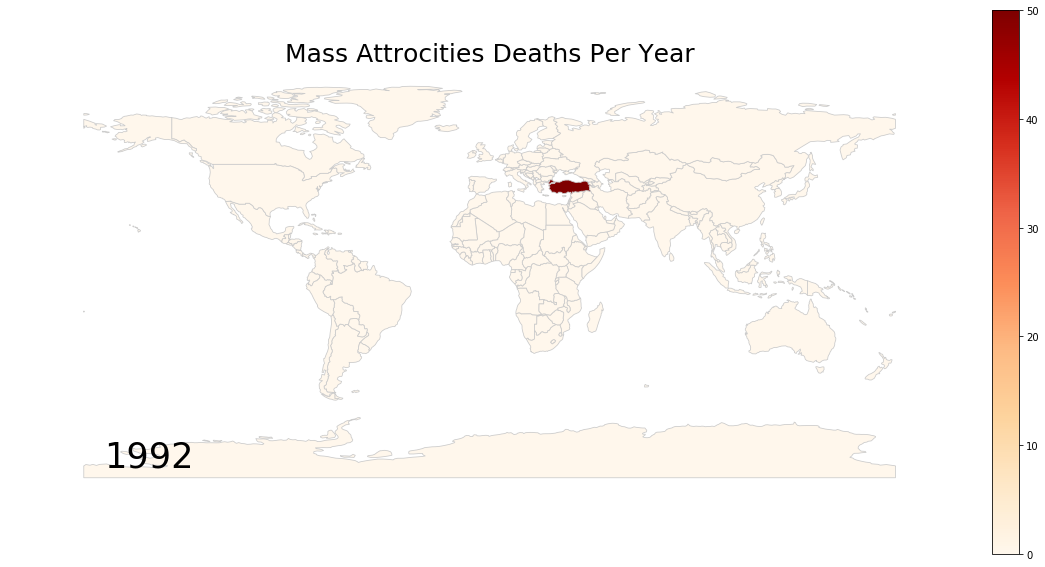

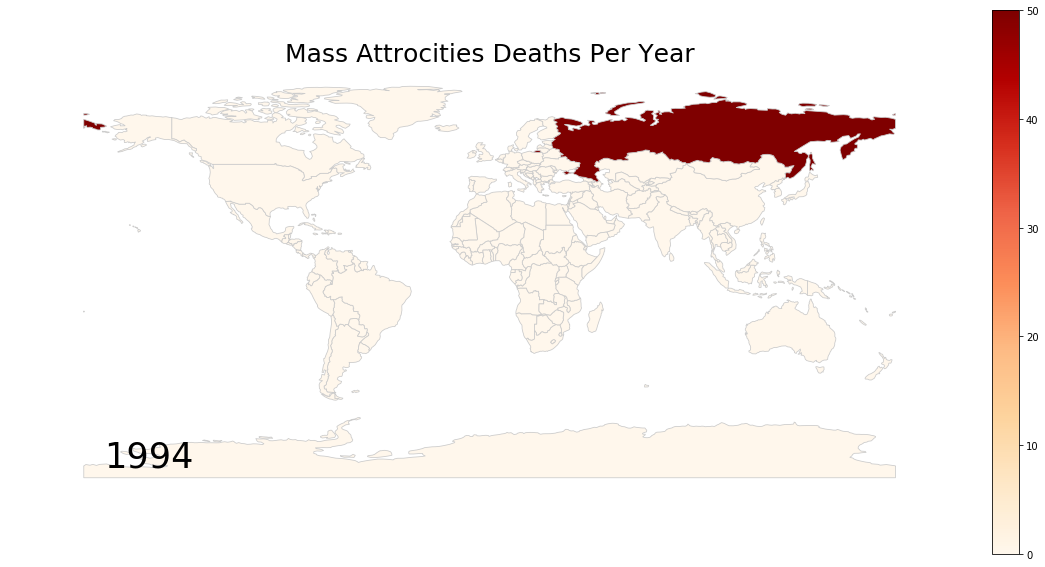

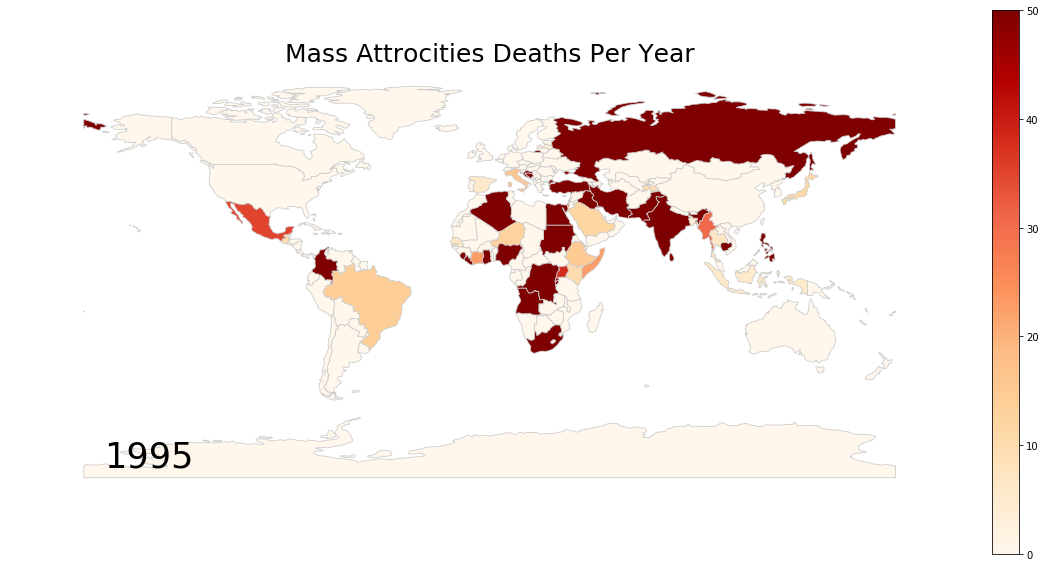

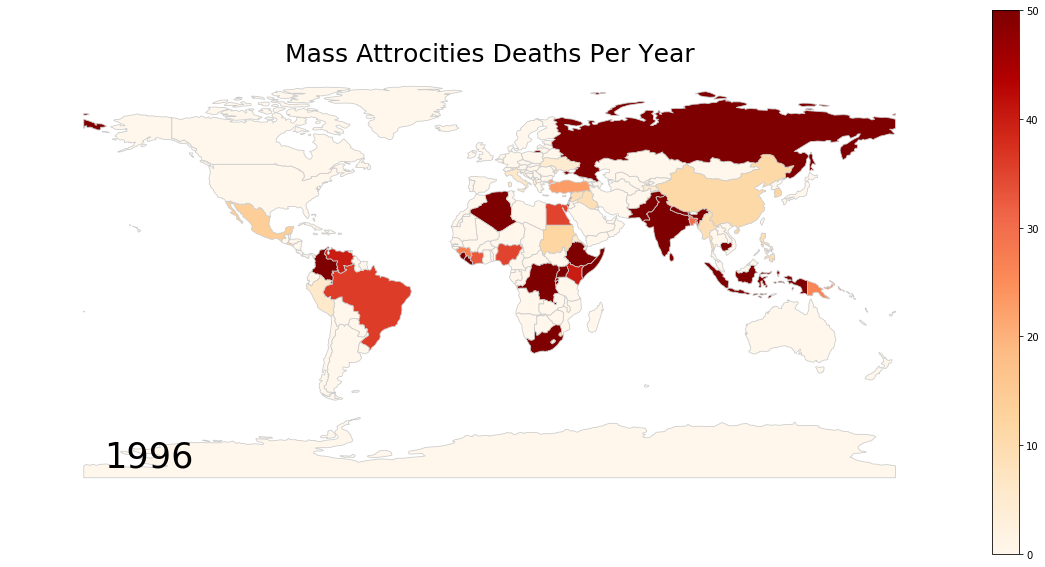

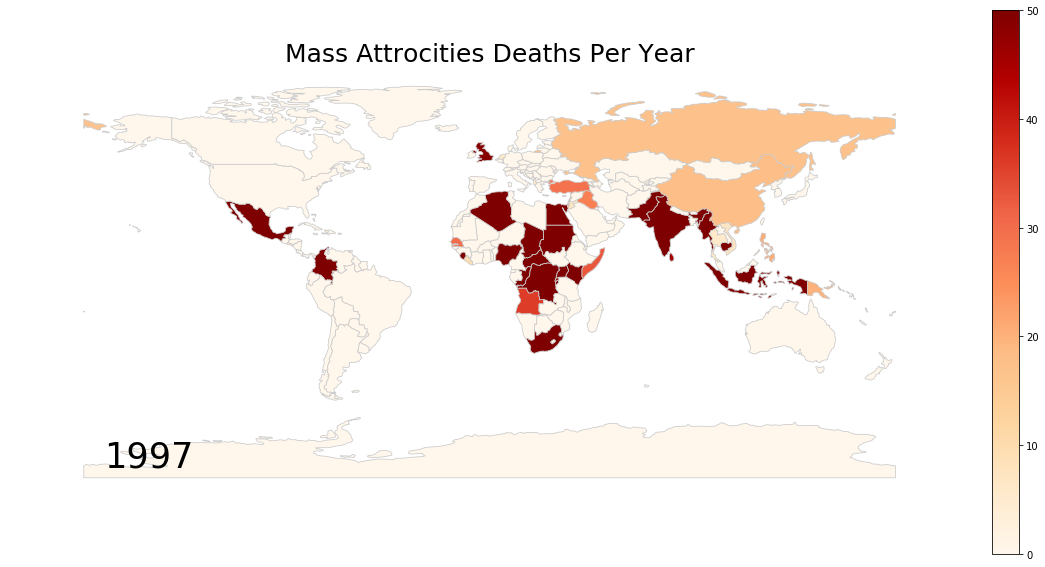

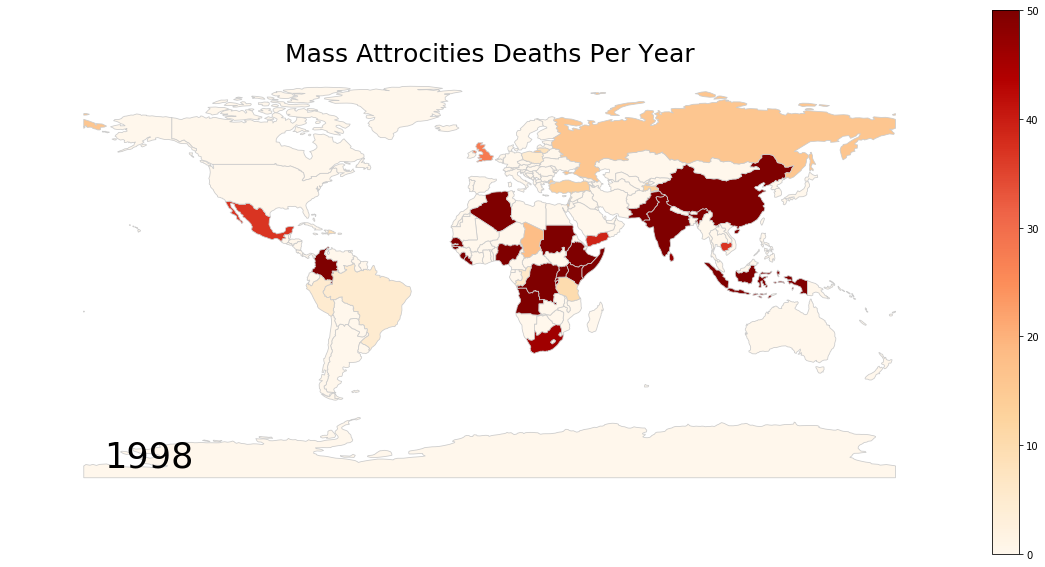

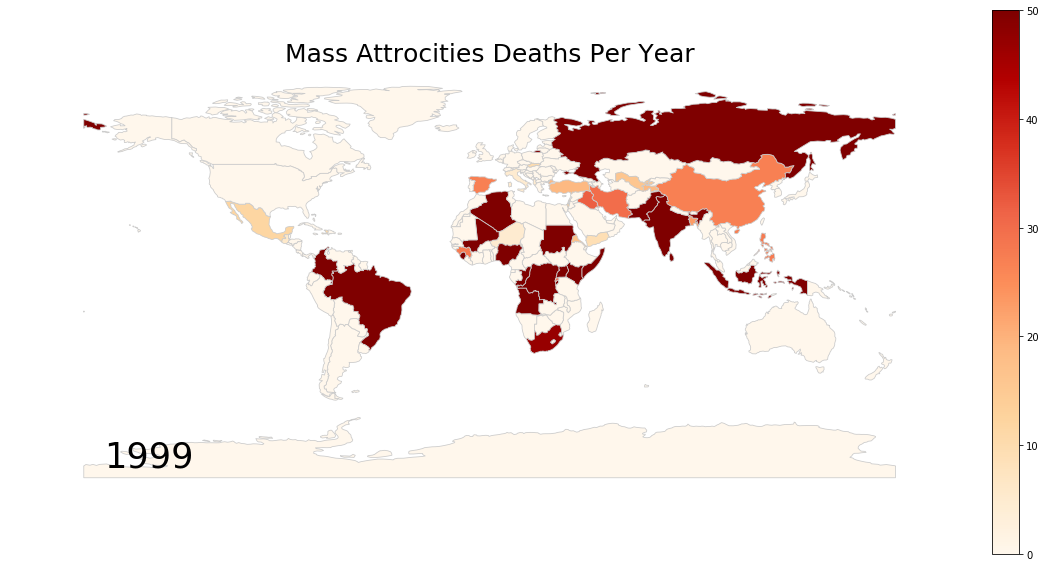

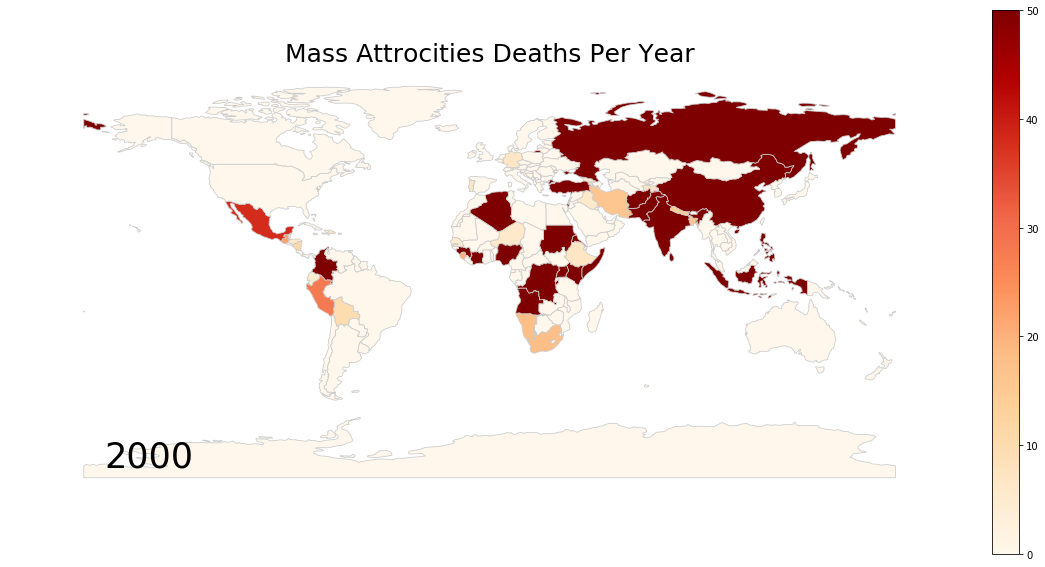

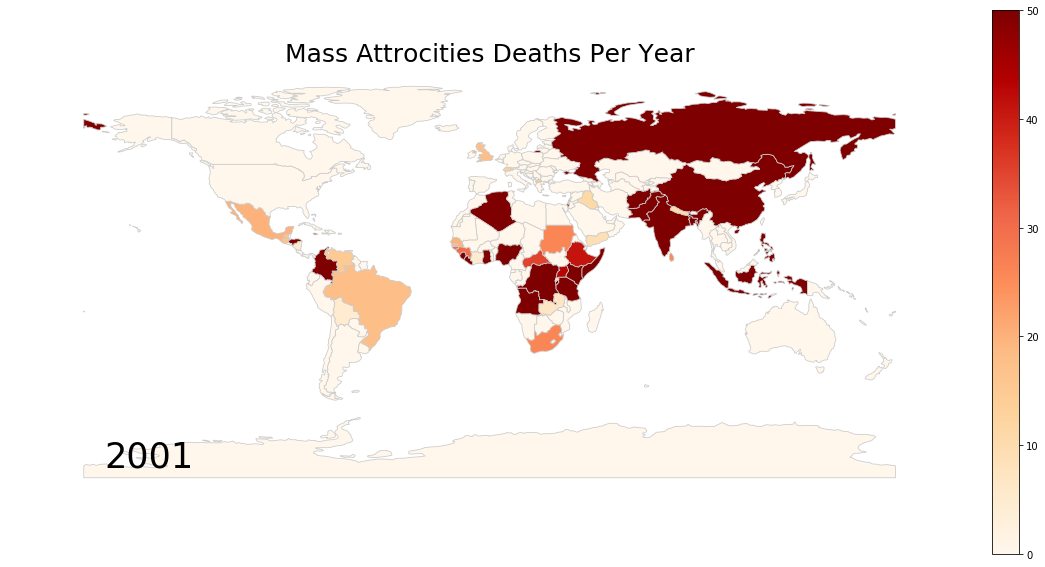

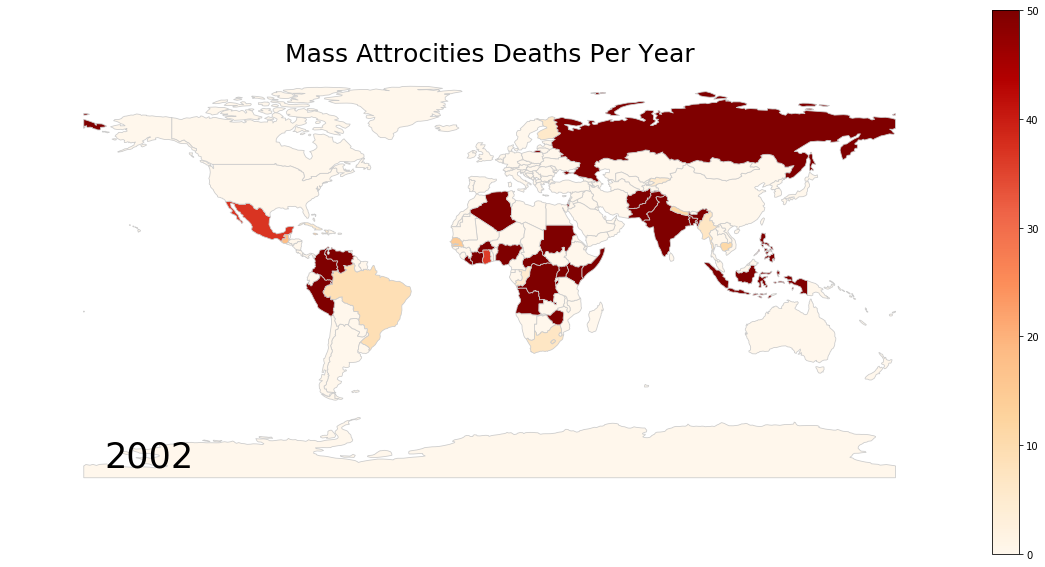

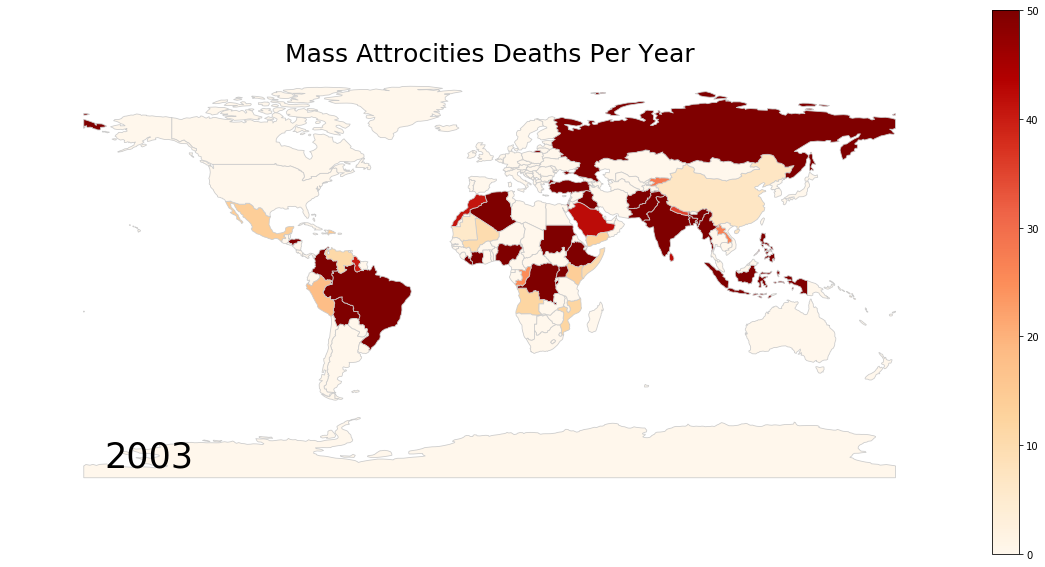

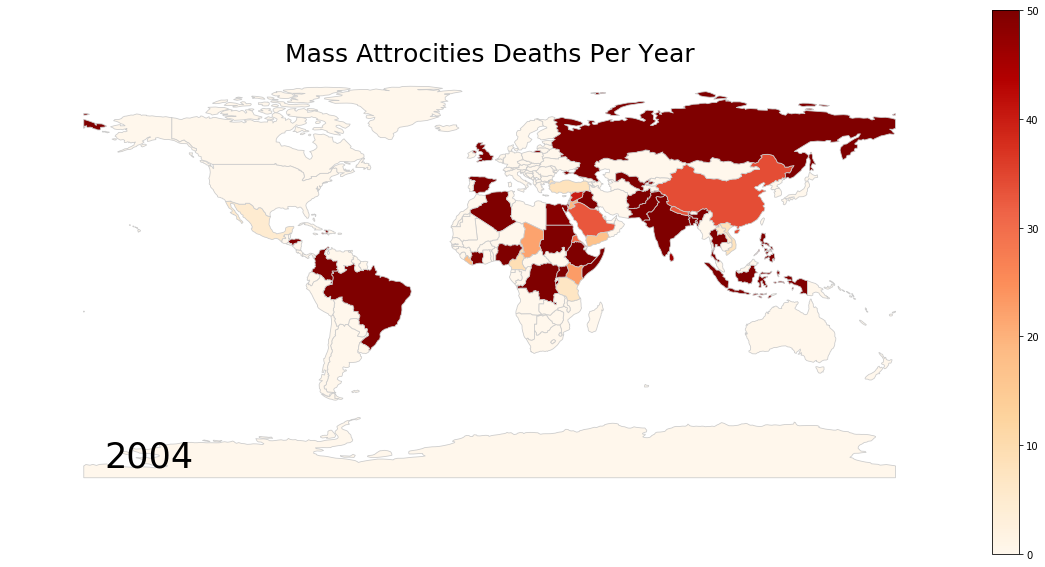

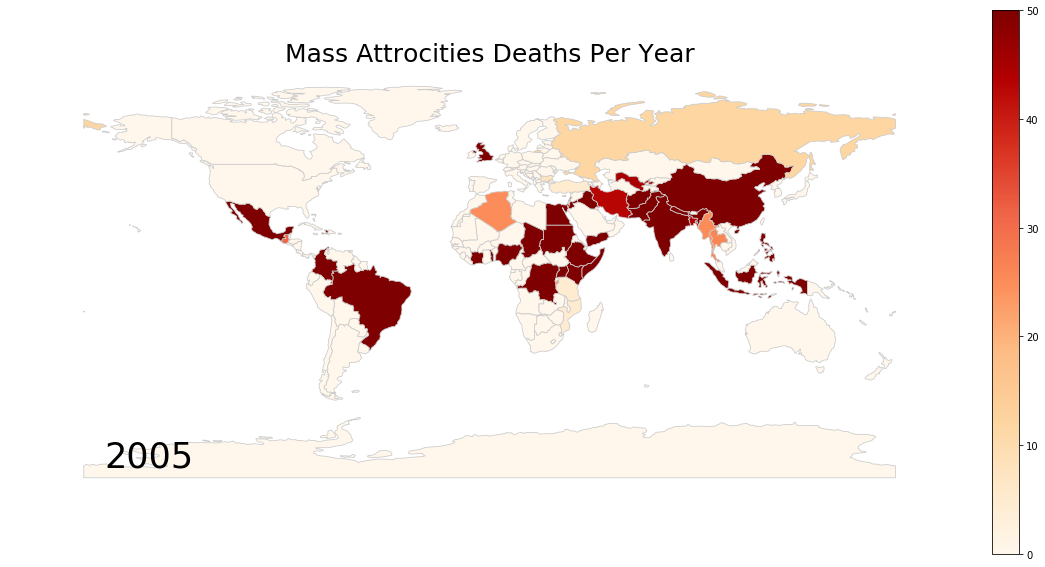

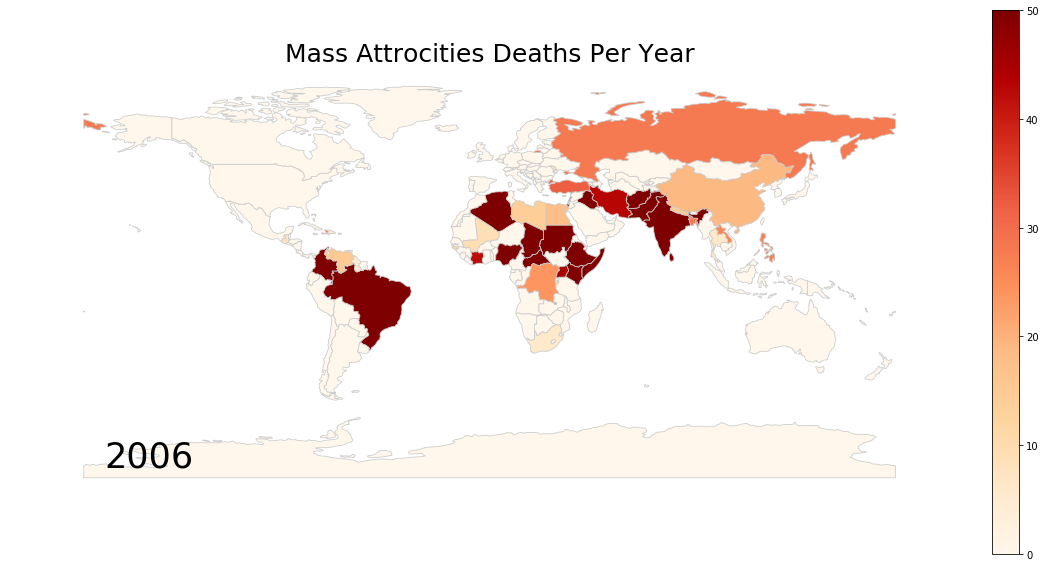

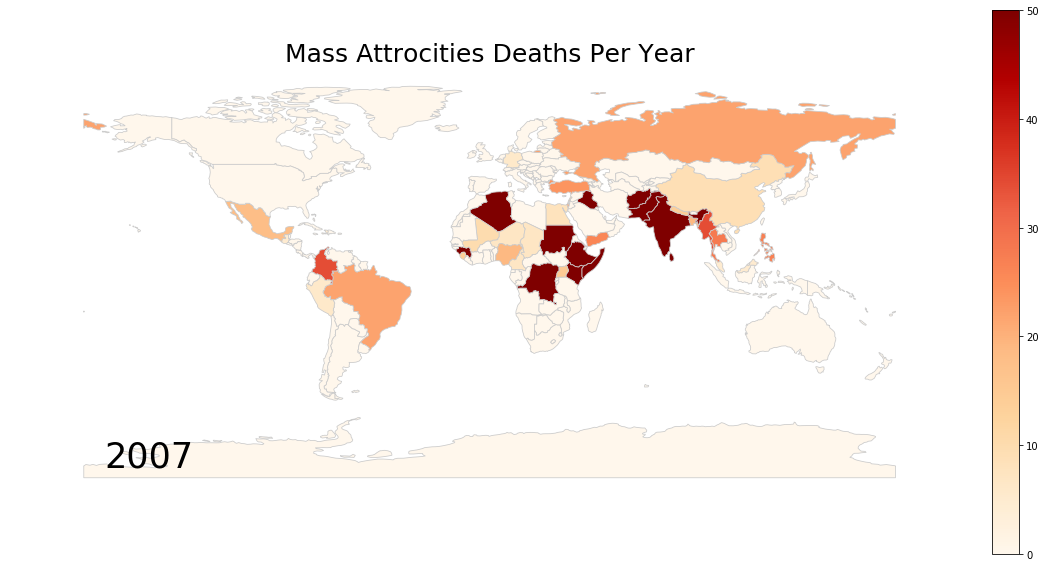

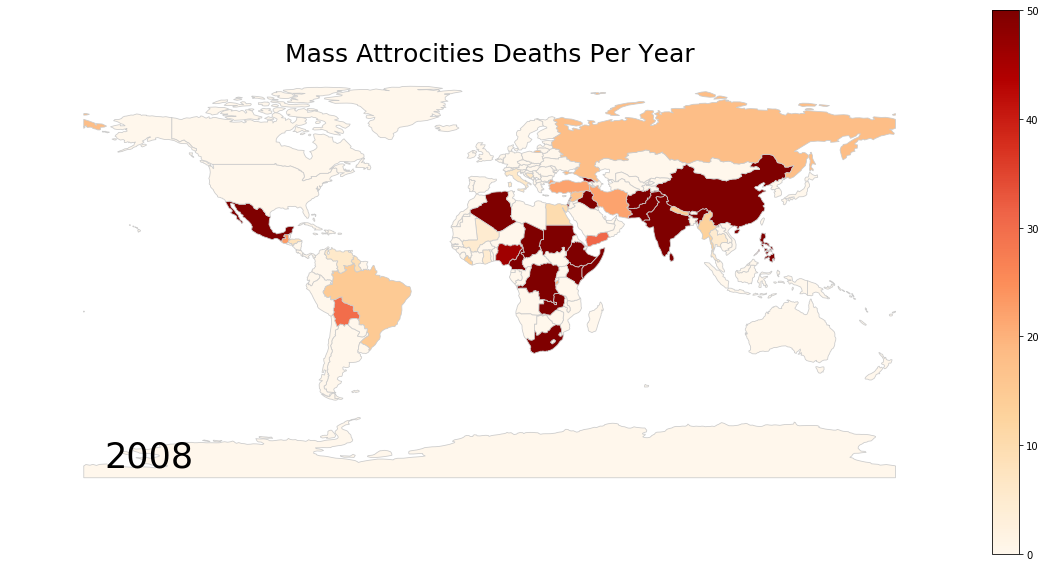

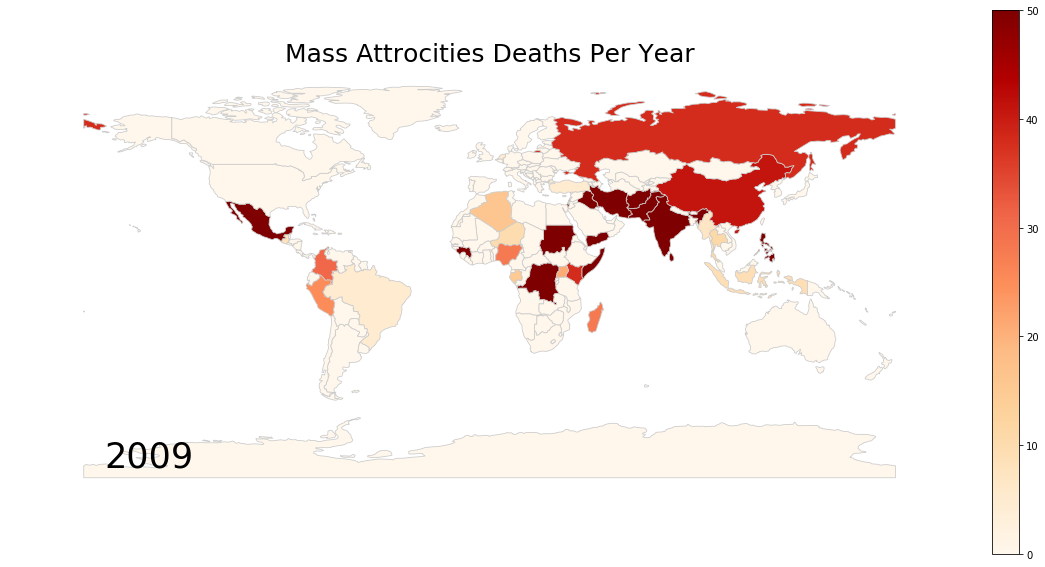

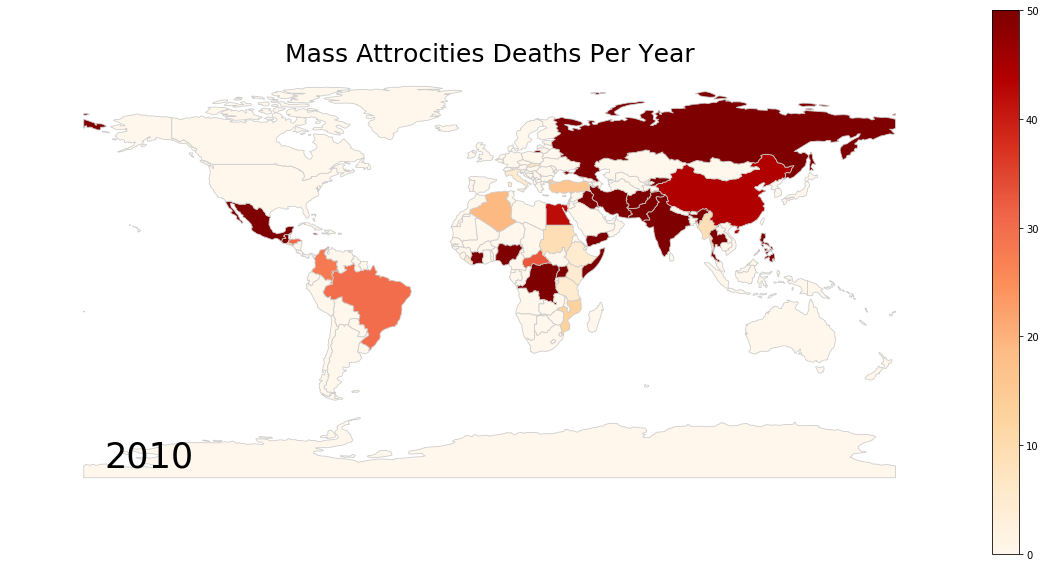

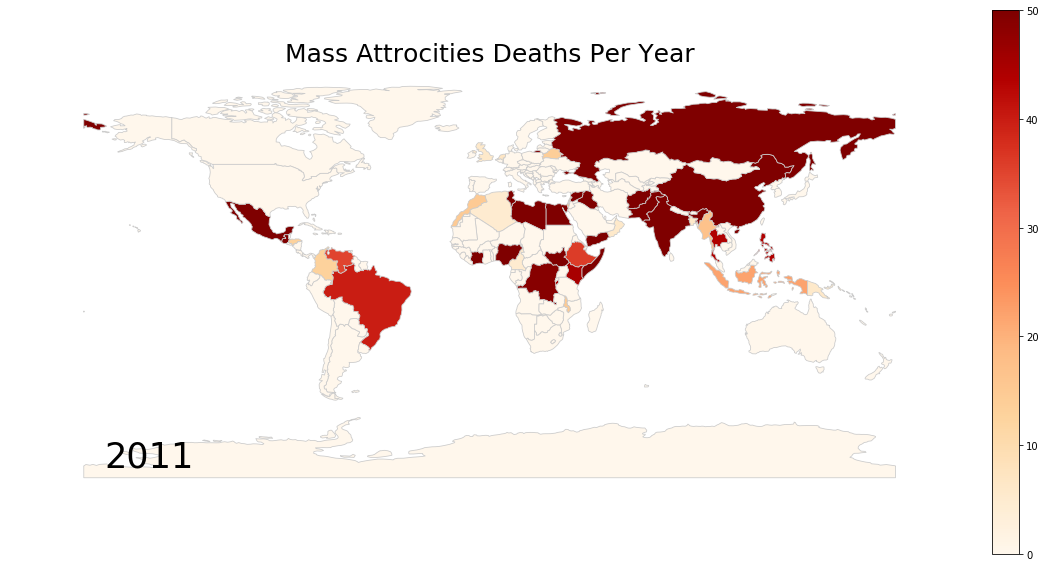

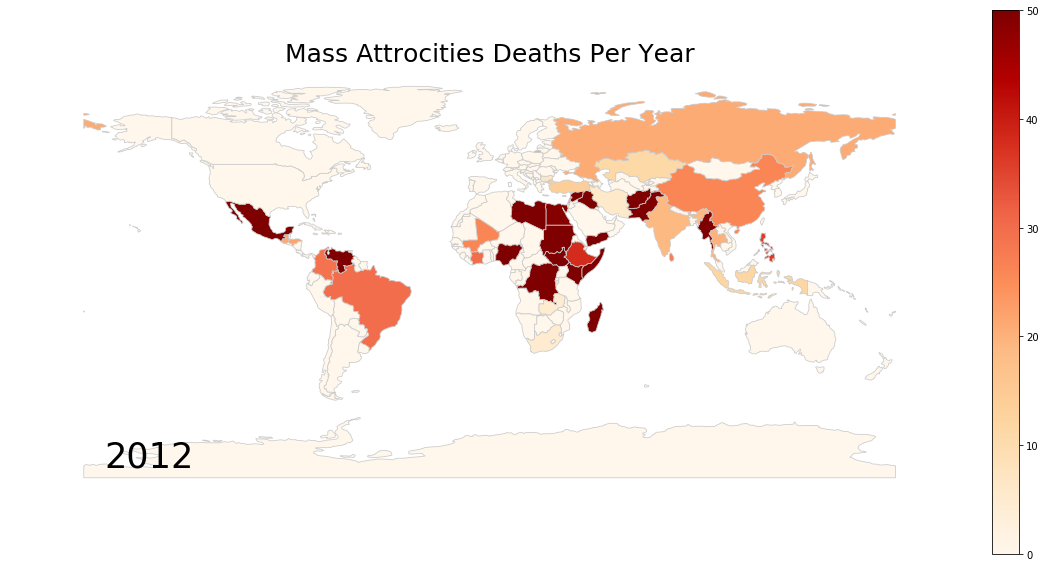

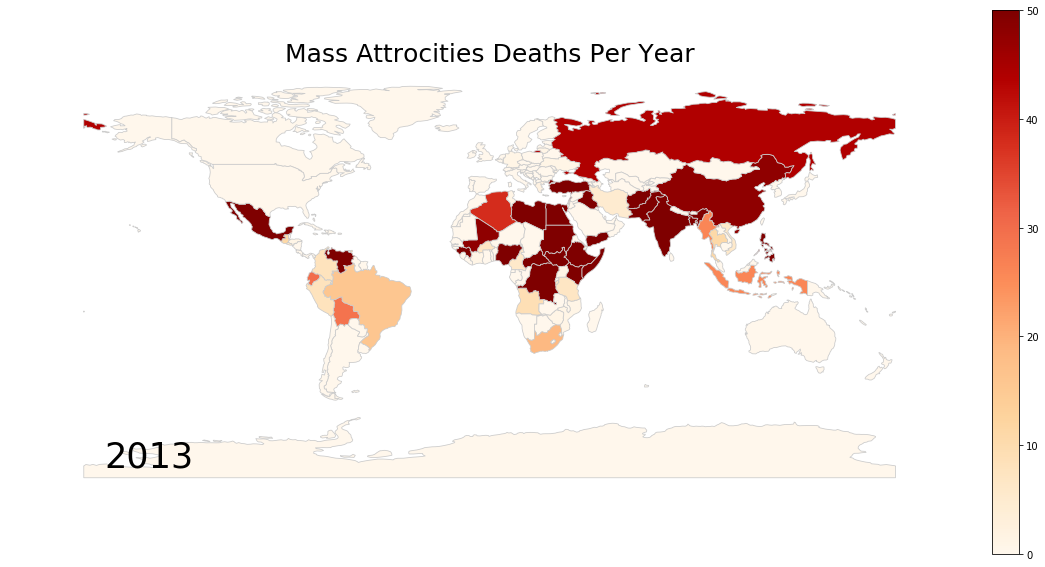

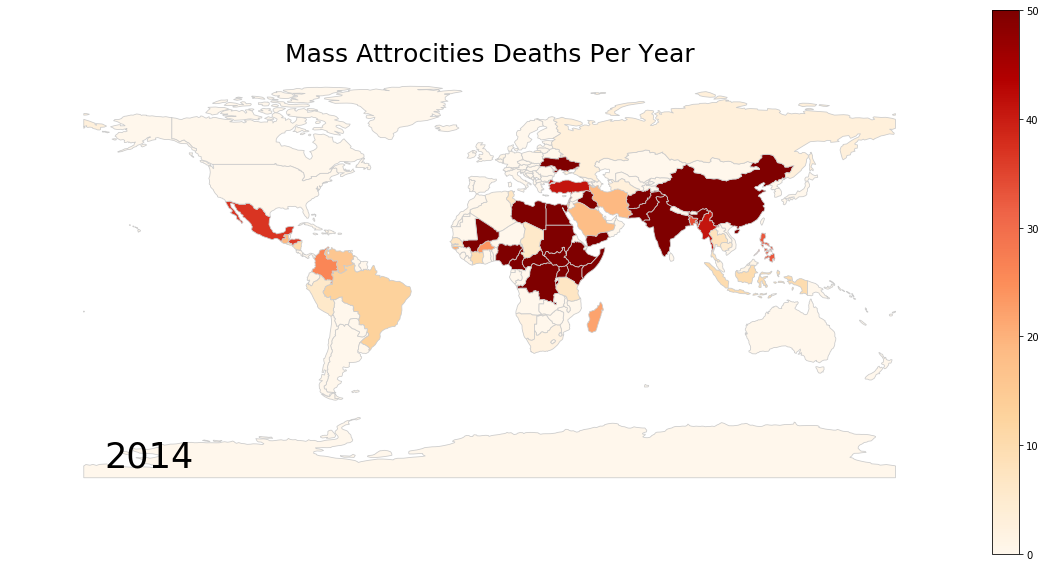

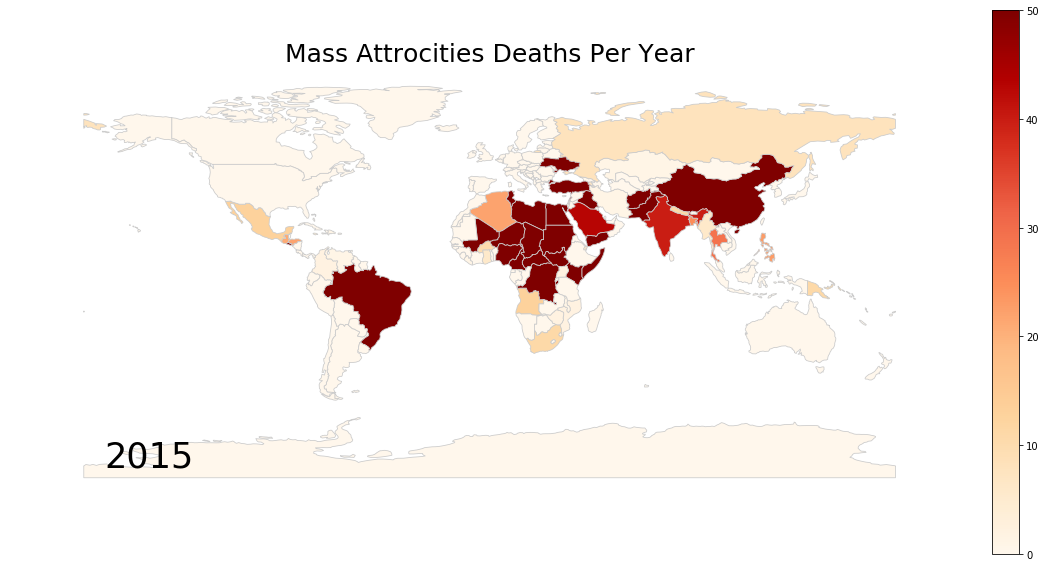

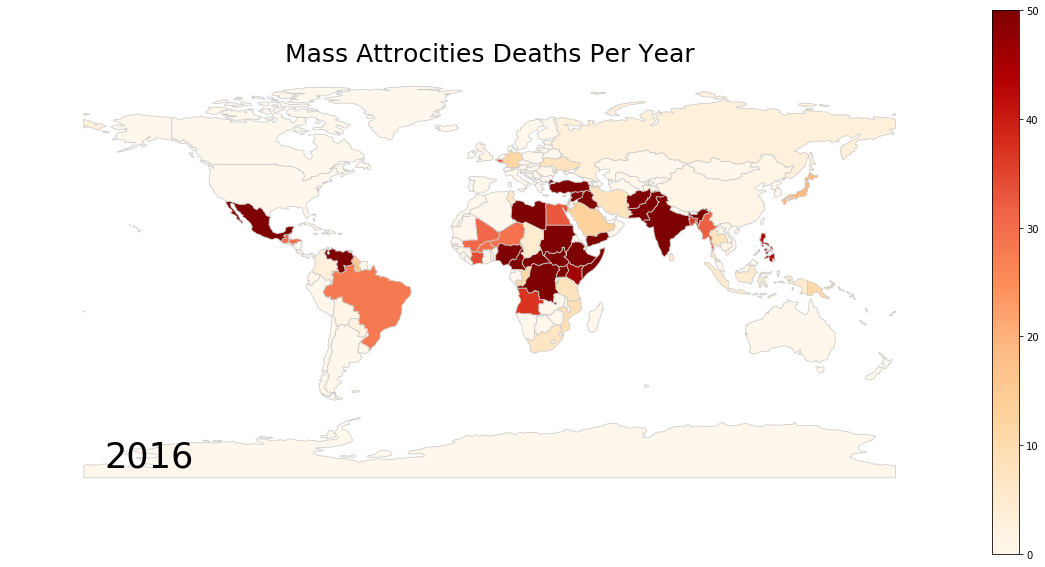

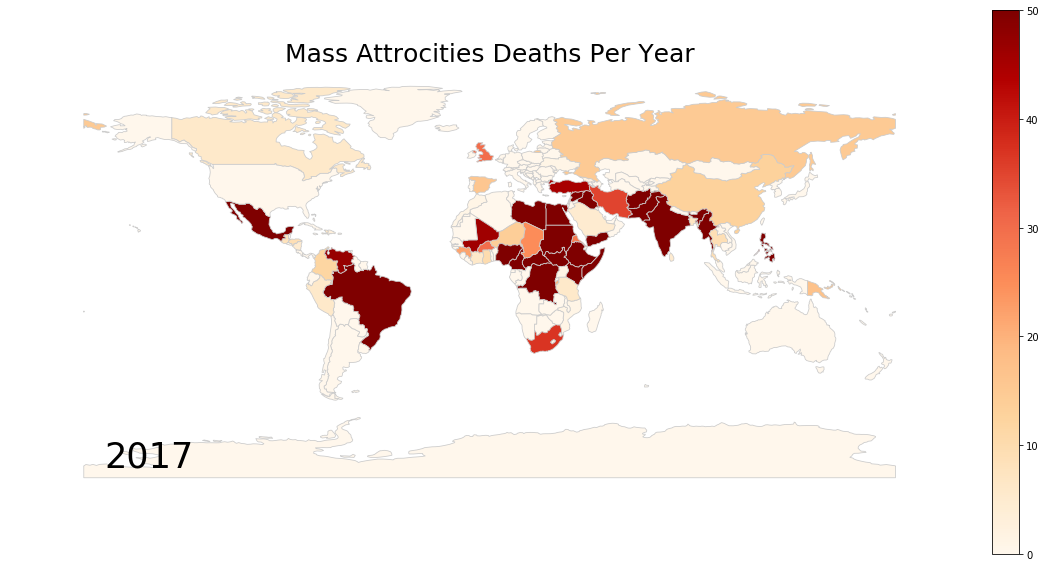

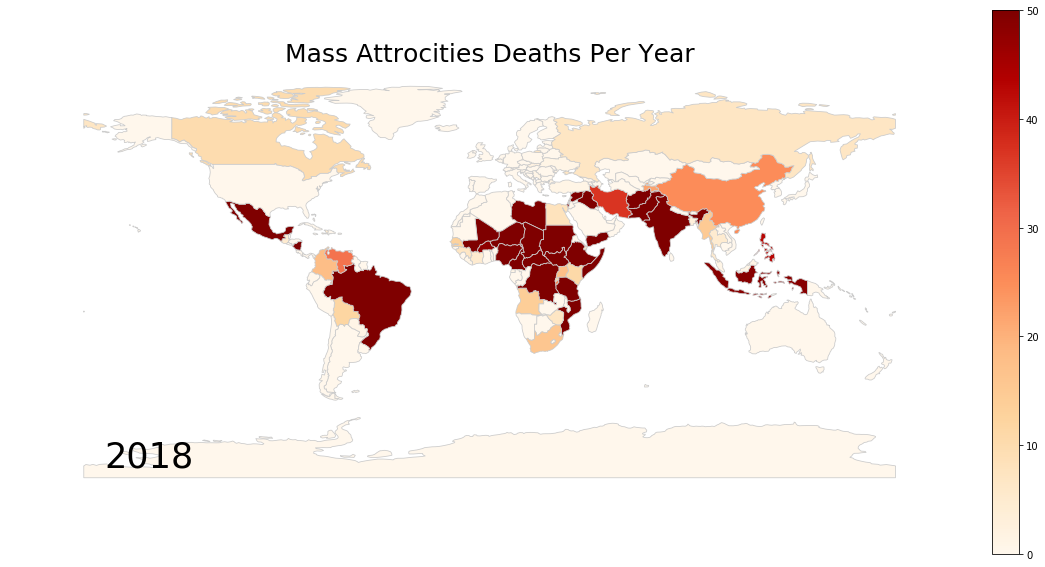

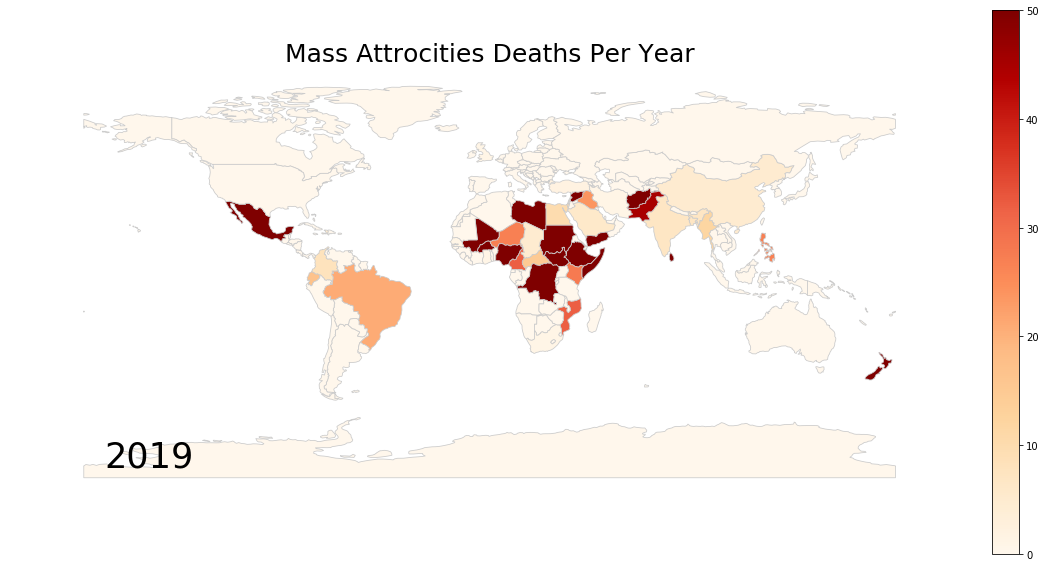

In [91]:
# CREATE A LOOP TO MAKE MULTIPLE MAPS WITH YEAR ANNOTATIONS

# save all the maps in the charts folder
output_path = '/Users/annikasquires/Desktop/Genocide Data'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years=[1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
# set the min and max range for the choropleth map
vmin, vmax = 0, 50



# start the for loop to create one map per year
for year in list_of_years:
   

    # create map[]
    fig = merged1.plot(column=year, cmap='OrRd', figsize=(20,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True,norm=plt.Normalize(vmin=vmin, vmax=vmax) ) # UDPATE: added plt.Normalize to keep the legend range the same for all maps

    # remove axis of chart
    fig.axis('off')
 
    # add a title
    fig.set_title('Mass Attrocities Deaths Per Year', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
 
    # create an annotation for the year
    
    

        # create an annotation for the year in list_of_years
    only_year = year
  
    only_year = str(year)
    #only_year_1= int(only_year)
    
    
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    

    
    
    filepath = os.path.join(output_path, 'hh_'+only_year+'.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
    
'''  


# only_year = year[:4]
    
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)


    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_violence.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
'''

# MAKE GIF:
in this important step I will take the graphs from above to create a gif which will be included in the power point  

In [93]:
import imageio
images = []

filenames= ['/Users/annikasquires/Desktop/Genocide Data/hh_1992.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1994.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1995.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1996.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1997.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1998.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_1999.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2000.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2001.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2002.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2003.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2004.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2005.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2006.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2007.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2008.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2009.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2010.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2011.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2012.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2013.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2014.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2015.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2016.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2017.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2018.png',
'/Users/annikasquires/Desktop/Genocide Data/hh_2019.png']
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie_1.gif', images,duration=0.09)



# Part 2:
for part 2 I wanted to analyze the risk of mass attrocicites correlating with GDP and population 


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
#trying it first for 2018
data_18= pd.read_csv('/Users/annikasquires/Downloads/sra_2018.csv')

In [ ]:
#set index as country, rename columns and choose the data to use
data_18.rename(columns={'country':'Country'},inplace=True)
data_18.set_index('Country', inplace=True)
data_18=data_18.loc[:,['risk_in_2018_19','popsize.ln.combined']]

In [ ]:
#second set of data from IMF
gdp_data_18= pd.read_csv('/Users/annikasquires/Downloads/WEO_Data_final.csv')
gdp_data_18.set_index('Country', inplace=True)
gdp_data_18=gdp_data_18.loc[:,['2018']]
gdp_data_18.rename(columns={'2018':'GDP 2018'})

In [ ]:
#population
pop_18= pd.read_csv('/Users/annikasquires/Downloads/WPDS_2018_data.csv')
pop_18.set_index('Country',inplace= True)

In [ ]:
#combining 2 dataframes and getting rid of any errors in data set
result = pd.concat([data_18,gdp_data_18,pop_18], axis=1, join_axes=[data_18.index])
result.rename(columns={'2018':'GDP 2018'},inplace=True)

In [ ]:
#fill errors
result['Population mid-2018 (millions)'].fillna(value=84.3, limit=1,inplace=True)
result.at['Democratic Republic of Congo', 'Continent'] = 'Africa'
result=result.fillna(value=0, limit=2)
result=result.fillna(value=1354.164, limit=1)
result=result.fillna(0)
result['Population mid-2018 (millions)'].fillna(value=84.3, limit=1,inplace=True)

In [ ]:
#creating graph
    
#creating graph
fig,ax= plt.subplots(figsize=(12, 7),dpi= 120, facecolor='w', edgecolor='b')

In [ ]:
#adding grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [ ]:
# generating the plot.
y= result['risk_in_2018_19']
x = result['GDP 2018']*10
s = result['Population mid-2018 (millions)']
result['Continent']= pd.Categorical(result['Continent'])
c=result['Continent'].cat.codes

In [ ]:
#vertical line 
plt.axvline(x=11368,label='Average GDP PPP WorldWide',linestyle='--',color='darkturquoise')



#horiztonal line
avg= result.risk_in_2018_19.mean() 
plt.axhline(y=avg,label='Average Risk of Mass Atrocities WorldWide',linestyle='--',color='deepskyblue')

In [ ]:
#writing the legend 
for a in [1, 10, 100, 1000]:
            plt.scatter([], [], c='k', alpha=0.5, s=a,
                        label=str(a) + ' million')
            plt.legend(scatterpoints=1, frameon=False,
                   labelspacing=3, loc='upper right');

In [ ]:
#label
colors='b'
plt.scatter(x,y,s,c, alpha=.5)
plt.xlabel('Income per person in US Dollars (Nominal GDP/capita, PPP$ inflation adjusted, log scale) ', fontsize=15)
#plt.colorbar()
plt.ylabel('Risk of Mass Attrocities in 2018-2019',fontsize=15)

  

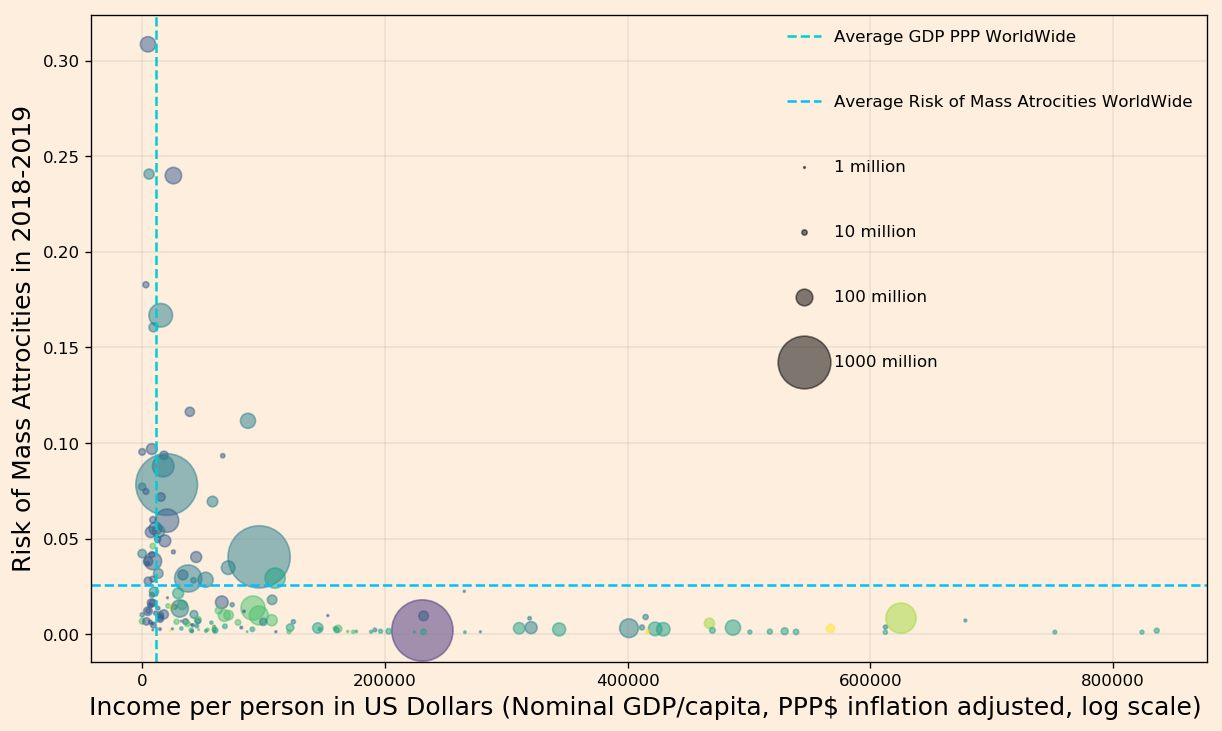

In [96]:
background = tuple(np.array([253, 238, 222]) / 255)
### This is the FT background collor

plt.rcParams.update(plt.rcParamsDefault) # This will reset defaluts...



fig.set_facecolor(background)
ax.set_facecolor(background)

plt.show()